In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.ensemble import RandomForestClassifier

In [2]:
big5_sc = pd.read_csv('./big5_scored.csv')

In [3]:
big5_sc

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,O6,O7,O8,O9,O10,E_SC,N_SC,A_SC,C_SC,O_SC
0,4,4,5,4,5,5,4,3,5,5,...,5,4,2,5,5,44,49,46,47,43
1,2,4,3,3,3,3,1,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,5,5,1,2,5,5,1,1,5,5,...,5,5,5,5,5,35,14,38,49,45
3,2,1,2,2,3,2,3,2,4,1,...,4,5,2,5,5,22,17,37,26,41
4,3,5,3,3,3,5,3,5,3,1,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,...,5,4,2,5,3,21,19,42,36,35
19715,2,3,2,3,2,3,2,2,4,2,...,3,4,2,3,3,25,39,36,32,30
19716,2,1,4,1,5,1,1,4,1,1,...,5,1,5,5,5,21,10,26,23,37
19717,1,2,2,3,2,2,1,3,4,1,...,5,5,3,5,5,21,20,38,43,42


In [4]:
E = big5_sc.loc[:, "E1":"E10"]

In [5]:
E.loc[:,"score"] = big5_sc.loc[:,"E_SC"]

C:\Users\ajou\AppData\Local\Temp\ipykernel_8952\3466361353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E.loc[:,"score"] = big5_sc.loc[:,"E_SC"]


In [6]:
E

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,score
0,4,4,5,4,5,5,4,3,5,5,44
1,2,4,3,3,3,3,1,1,1,1,22
2,5,5,1,2,5,5,1,1,5,5,35
3,2,1,2,2,3,2,3,2,4,1,22
4,3,5,3,3,3,5,3,5,3,1,34
...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,21
19715,2,3,2,3,2,3,2,2,4,2,25
19716,2,1,4,1,5,1,1,4,1,1,21
19717,1,2,2,3,2,2,1,3,4,1,21


In [7]:
categorys = []
for val in E['score']:
    if val < 30:
        category = 0
    else:
        category = 1
    categorys.append(category)
    
E['C'] = categorys

C:\Users\ajou\AppData\Local\Temp\ipykernel_8952\388496684.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E['C'] = categorys


In [8]:
E

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,score,C
0,4,4,5,4,5,5,4,3,5,5,44,1
1,2,4,3,3,3,3,1,1,1,1,22,0
2,5,5,1,2,5,5,1,1,5,5,35,1
3,2,1,2,2,3,2,3,2,4,1,22,0
4,3,5,3,3,3,5,3,5,3,1,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,2,3,1,4,3,1,4,1,1,21,0
19715,2,3,2,3,2,3,2,2,4,2,25,0
19716,2,1,4,1,5,1,1,4,1,1,21,0
19717,1,2,2,3,2,2,1,3,4,1,21,0


In [48]:
C_train_X, C_train_y = E.iloc[:int(len(E.index)*0.8), :-2], E.iloc[:int(len(E.index)*0.8), -1]
C_test_X, C_test_y = E.iloc[int(len(E.index)*0.8):, :-2], E.iloc[int(len(E.index)*0.8):, -1]
C_test_X = C_test_X.reset_index(drop=True)

In [56]:
C_classifier = RandomForestClassifier(n_estimators = 10)
C_classifier.fit(C_train_X, C_train_y)

C_score = C_classifier.score(C_test_X, C_test_y)
print(C_score)

C_train_score = C_classifier.score(C_train_X, C_train_y)
print(C_train_score)

0.9645030425963489
0.9986687797147386


In [57]:
C_y_pred = C_classifier.predict(C_test_X)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(C_test_y), (C_test_y != C_y_pred).sum()))
print('정확도 : %.2f' %((len(C_test_y) - (C_test_y != C_y_pred).sum()) / len(C_test_y)))

총 테스트 개수 : 3944, 오류개수 : 140
정확도 : 0.96


In [58]:
C_train_y_pred = C_classifier.predict(C_train_X)
print('총 테스트 개수 : %d, 오류개수 : %d' %(len(C_train_y), (C_train_y != C_train_y_pred).sum()))
print('정확도 : %.2f' %((len(C_train_y) - (C_train_y != C_train_y_pred).sum()) / len(C_train_y)))

총 테스트 개수 : 15775, 오류개수 : 21
정확도 : 1.00


feature ranking:
1. feature E5 (0.221)
2. feature E7 (0.143)
3. feature E4 (0.125)
4. feature E10 (0.124)
5. feature E1 (0.113)
6. feature E2 (0.059)
7. feature E9 (0.059)
8. feature E3 (0.055)
9. feature E8 (0.053)
10. feature E6 (0.050)


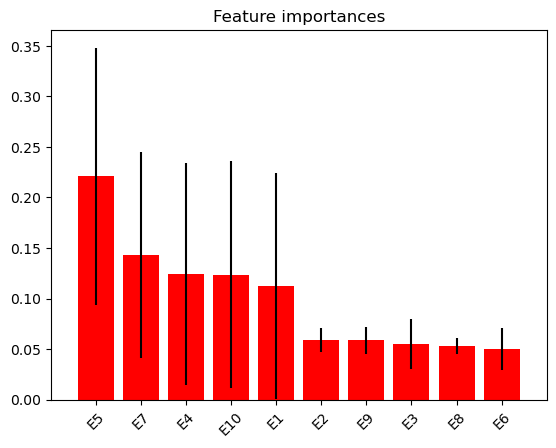

In [59]:
importances = C_classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in C_classifier.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("feature ranking:")

for f in range(len(C_train_X.columns)):
    print("{}. feature {} ({:.3f})".format(f+1, C_train_X.columns[indices][f], importances[indices[f]]))
    
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(C_train_X.columns)), importances[indices],
       color = "r", yerr = std[indices], align = "center")
plt.xticks(range(len(C_train_X.columns)), C_train_X.columns[indices], rotation = 45)
plt.xlim([-1, len(C_train_X.columns)])
plt.show()

In [60]:
random.seed(0)

In [72]:
E7_trans_C_train_X = C_train_X.copy()
random.shuffle(E7_trans_C_train_X.loc[:,"E7"])

E7_trans_C_score =C_classifier.score(E7_trans_C_train_X, C_train_y)

E10_trans_C_train_X = C_train_X.copy()
random.shuffle(E10_trans_C_train_X.loc[:,"E10"])

E10_trans_C_score =C_classifier.score(E10_trans_C_train_X, C_train_y)

E5_trans_C_train_X = C_train_X.copy()
random.shuffle(E5_trans_C_train_X.loc[:,"E5"])

E5_trans_C_score =C_classifier.score(E5_trans_C_train_X, C_train_y)

E4_trans_C_train_X = C_train_X.copy()
random.shuffle(E4_trans_C_train_X.loc[:,"E4"])

E4_trans_C_score =C_classifier.score(E4_trans_C_train_X, C_train_y)

E1_trans_C_train_X = C_train_X.copy()
random.shuffle(E1_trans_C_train_X.loc[:,"E1"])

E1_trans_C_score =C_classifier.score(E1_trans_C_train_X, C_train_y)

E2_trans_C_train_X = C_train_X.copy()
random.shuffle(E2_trans_C_train_X.loc[:,"E2"])

E2_trans_C_score =C_classifier.score(E2_trans_C_train_X, C_train_y)

E8_trans_C_train_X = C_train_X.copy()
random.shuffle(E8_trans_C_train_X.loc[:,"E8"])

E8_trans_C_score =C_classifier.score(E8_trans_C_train_X, C_train_y)

E9_trans_C_train_X = C_train_X.copy()
random.shuffle(E9_trans_C_train_X.loc[:,"E9"])

E9_trans_C_score =C_classifier.score(E9_trans_C_train_X, C_train_y)

E6_trans_C_train_X = C_train_X.copy()
random.shuffle(E6_trans_C_train_X.loc[:,"E6"])

E6_trans_C_score =C_classifier.score(E6_trans_C_train_X, C_train_y)

E3_trans_C_train_X = C_train_X.copy()
random.shuffle(E3_trans_C_train_X.loc[:,"E3"])

E3_trans_C_score =C_classifier.score(E3_trans_C_train_X, C_train_y)

In [86]:
print("Original Classfication Accuracy : %.4f"%C_train_score)
print("1st high importance shuffled Accuracy : %.4f"%E7_trans_C_score)
print("2nd high importance shuffled Accuracy : %.4f"%E5_trans_C_score)
print("3rd high importance shuffled Accuracy : %.4f"%E10_trans_C_score)
print("4th high importance shuffled Accuracy : %.4f"%E4_trans_C_score)
print("5th high importance shuffled Accuracy : %.4f"%E1_trans_C_score)
print("6th high importance shuffled Accuracy : %.4f"%E2_trans_C_score)
print("7th high importance shuffled Accuracy : %.4f"%E8_trans_C_score)
print("8th high importance shuffled Accuracy : %.4f"%E9_trans_C_score)
print("9th high importance shuffled Accuracy : %.4f"%E6_trans_C_score)
print("10th high importance shuffled Accuracy : %.4f"%E3_trans_C_score)

Original Classfication Accuracy : 0.9987
1st high importance shuffled Accuracy : 0.9454
2nd high importance shuffled Accuracy : 0.9405
3rd high importance shuffled Accuracy : 0.9553
4th high importance shuffled Accuracy : 0.9530
5th high importance shuffled Accuracy : 0.9545
6th high importance shuffled Accuracy : 0.9561
7th high importance shuffled Accuracy : 0.9632
8th high importance shuffled Accuracy : 0.9525
9th high importance shuffled Accuracy : 0.9640
10th high importance shuffled Accuracy : 0.9631


In [74]:
random.seed(0)

In [77]:
E7_trans_C_test_X = C_test_X.copy()
random.shuffle(E7_trans_C_test_X.loc[:,"E7"])

E7_trans_C_test_score =C_classifier.score(E7_trans_C_test_X, C_test_y)

E5_trans_C_test_X = C_test_X.copy()
random.shuffle(E5_trans_C_test_X.loc[:,"E5"])

E5_trans_C_test_score =C_classifier.score(E5_trans_C_test_X, C_test_y)

E10_trans_C_test_X = C_test_X.copy()
random.shuffle(E10_trans_C_test_X.loc[:,"E10"])

E10_trans_C_test_score =C_classifier.score(E10_trans_C_test_X, C_test_y)

E4_trans_C_test_X = C_test_X.copy()
random.shuffle(E4_trans_C_test_X.loc[:,"E4"])

E4_trans_C_test_score =C_classifier.score(E4_trans_C_test_X, C_test_y)

E1_trans_C_test_X = C_test_X.copy()
random.shuffle(E1_trans_C_test_X.loc[:,"E1"])

E1_trans_C_test_score =C_classifier.score(E1_trans_C_test_X, C_test_y)

E2_trans_C_test_X = C_test_X.copy()
random.shuffle(E2_trans_C_test_X.loc[:,"E2"])

E2_trans_C_test_score =C_classifier.score(E2_trans_C_test_X, C_test_y)

E8_trans_C_test_X = C_test_X.copy()
random.shuffle(E8_trans_C_test_X.loc[:,"E8"])

E8_trans_C_test_score =C_classifier.score(E8_trans_C_test_X, C_test_y)

E9_trans_C_test_X = C_test_X.copy()
random.shuffle(E9_trans_C_test_X.loc[:,"E9"])

E9_trans_C_test_score =C_classifier.score(E9_trans_C_test_X, C_test_y)

E6_trans_C_test_X = C_test_X.copy()
random.shuffle(E6_trans_C_test_X.loc[:,"E6"])

E6_trans_C_test_score =C_classifier.score(E6_trans_C_test_X, C_test_y)

E3_trans_C_test_X = C_test_X.copy()
random.shuffle(E3_trans_C_test_X.loc[:,"E3"])

E3_trans_C_test_score =C_classifier.score(E3_trans_C_test_X, C_test_y)

In [78]:
print("Original Classfication Test Accuracy : %.4f"%C_score)
print("1st high importance shuffled Accuracy : %.4f"%E7_trans_C_test_score)
print("2nd high importance shuffled Accuracy : %.4f"%E5_trans_C_test_score)
print("3rd high importance shuffled Accuracy : %.4f"%E10_trans_C_test_score)
print("4th high importance shuffled Accuracy : %.4f"%E4_trans_C_test_score)
print("5th high importance shuffled Accuracy : %.4f"%E1_trans_C_test_score)
print("6th high importance shuffled Accuracy : %.4f"%E2_trans_C_test_score)
print("7th high importance shuffled Accuracy : %.4f"%E8_trans_C_test_score)
print("8th high importance shuffled Accuracy : %.4f"%E9_trans_C_test_score)
print("9th high importance shuffled Accuracy : %.4f"%E6_trans_C_test_score)
print("10th high importance shuffled Accuracy : %.4f"%E3_trans_C_test_score)

Original Classfication Test Accuracy : 0.9645
1st high importance shuffled Accuracy : 0.9267
2nd high importance shuffled Accuracy : 0.9282
3rd high importance shuffled Accuracy : 0.9346
4th high importance shuffled Accuracy : 0.9369
5th high importance shuffled Accuracy : 0.9386
6th high importance shuffled Accuracy : 0.9450
7th high importance shuffled Accuracy : 0.9404
8th high importance shuffled Accuracy : 0.9381
9th high importance shuffled Accuracy : 0.9369
10th high importance shuffled Accuracy : 0.9445


In [79]:
E_2_se_train_X = C_train_X.copy()
E_2_se_train_X = E_2_se_train_X.loc[:, ["E5", "E7"]]

E_2_se_test_X = C_test_X.copy()
E_2_se_test_X = E_2_se_test_X.loc[:, ["E5", "E7"]]
E_2_se_test_X = E_2_se_test_X.reset_index(drop=True)

E_2_se_classifier = RandomForestClassifier(n_estimators = 10)
E_2_se_classifier.fit(E_2_se_train_X, C_train_y)

E_2_se_score = E_2_se_classifier.score(E_2_se_train_X, C_train_y)
print(E_2_se_score)

E_2_se_test_score = E_2_se_classifier.score(E_2_se_test_X, C_test_y)
print(E_2_se_test_score)

0.8510935023771791
0.8460953346855984


In [83]:
E_3_se_train_X = C_train_X.copy()
E_3_se_train_X = E_3_se_train_X.loc[:, ["E5", "E7", "E10"]]

E_3_se_test_X = C_test_X.copy()
E_3_se_test_X = E_3_se_test_X.loc[:, ["E5", "E7", "E10"]]
E_3_se_test_X = E_3_se_test_X.reset_index(drop=True)

E_3_se_classifier = RandomForestClassifier(n_estimators = 10)
E_3_se_classifier.fit(E_3_se_train_X, C_train_y)

E_3_se_score = E_3_se_classifier.score(E_3_se_train_X, C_train_y)
print(E_3_se_score)

E_3_se_test_score = E_3_se_classifier.score(E_3_se_test_X, C_test_y)
print(E_3_se_test_score)

0.8748019017432647
0.8734787018255578


In [84]:
E_4_se_train_X = C_train_X.copy()
E_4_se_train_X = E_4_se_train_X.loc[:, ["E4", "E5", "E7", "E10"]]

E_4_se_test_X = C_test_X.copy()
E_4_se_test_X = E_4_se_test_X.loc[:, ["E4", "E5", "E7", "E10"]]
E_4_se_test_X = E_4_se_test_X.reset_index(drop=True)

E_4_se_classifier = RandomForestClassifier(n_estimators = 10)
E_4_se_classifier.fit(E_4_se_train_X, C_train_y)

E_4_se_score = E_4_se_classifier.score(E_4_se_train_X, C_train_y)
print(E_4_se_score)

E_4_se_test_score = E_4_se_classifier.score(E_4_se_test_X, C_test_y)
print(E_4_se_test_score)

0.9020602218700475
0.8932555780933062


In [85]:
E_5_se_train_X = C_train_X.copy()
E_5_se_train_X = E_5_se_train_X.loc[:, ["E1", "E4", "E5", "E7", "E10"]]

E_5_se_test_X = C_test_X.copy()
E_5_se_test_X = E_5_se_test_X.loc[:, ["E1", "E4", "E5", "E7", "E10"]]
E_5_se_test_X = E_5_se_test_X.reset_index(drop=True)

E_5_se_classifier = RandomForestClassifier(n_estimators = 10)
E_5_se_classifier.fit(E_5_se_train_X, C_train_y)

E_5_se_score = E_5_se_classifier.score(E_5_se_train_X, C_train_y)
print(E_5_se_score)

E_5_se_test_score = E_5_se_classifier.score(E_5_se_test_X, C_test_y)
print(E_5_se_test_score)

0.9242472266244057
0.9023833671399595
